In [371]:
from tqdm import tqdm

In [372]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [373]:
from matplotlib import cm

# Thing

In [374]:
# T = 300
# J = 1.21e-21 #iron, https://www.southampton.ac.uk/~rpb/thesis/node18.html
# B = J
# k = 1.38e-23


In [414]:
T = 1        # in units of J/k
Brel = 20

In [460]:
class Spin2D:
    def __init__(self, N, B=0, B_angle=0, max_rotation=np.pi):
        self.N = N
        self.rng = np.random.default_rng()
        self.spins = self.rng.random((N, N)) * 2 * np.pi
#         self.spins = np.zeros((N,N))
        self.B = B
        self.B_angle = B_angle
        self.updateInteractions()
        self.max_rotation = max_rotation
        self.im = None
        self.fig, self.axim = plt.subplots()
        self.im = self.axim.quiver(self.cosines, self.sines, self.spins, cmap=cm.hsv, pivot="middle")
        plt.colorbar(self.im, shrink=0.75)

    
    def update(self):
        self.updateSpins()
        self.updateInteractions()
        self.updateQuantities()
  
    def updateSpins(self):
        newAngles = (self.spins + self.rng.uniform(low=-self.max_rotation, high=self.max_rotation, size=(self.N,self.N))) % (2*np.pi)
        newEnergies = self.a * np.cos(newAngles) + self.b * np.sin(newAngles)
        deltaE = newEnergies - self.energy
        r = self.rng.random((self.N,self.N)) # array of random numbers
        self.spins = np.where(deltaE<0, newAngles, # if energetically favorable, choose new angle
                              np.where(r < np.exp(-deltaE/T), newAngles, self.spins))

    def updateInteractions(self):
        self.cosines = np.cos(self.spins)
        self.sines = np.sin(self.spins)

        self.a = np.zeros((self.N,self.N))
        self.b = np.zeros((self.N,self.N))

        for r in range(-1, self.N-1):
            for c in range(-1, self.N-1):
                self.a[r,c] -= (self.cosines[r-1,c] + self.cosines[r+1,c] + 
                                   self.cosines[r,c-1] + self.cosines[r,c+1])
                self.b[r,c] -= (self.sines[r-1,c] + self.sines[r+1,c] + 
                                   self.sines[r,c-1] + self.sines[r,c+1])

        # External magnetic field term
        self.a -= self.B * np.cos(self.B_angle)
        self.b -= self.B * np.sin(self.B_angle)

        self.energy = self.cosines * self.a + self.sines * self.b

    def updateQuantities(self):
        self.M = np.hypot(np.sum(self.cosines), np.sum(self.sines))/self.N**2
        self.meanEnergy = np.mean(self.energy)
    
    def updateQuiver(self):
        self.im.set_UVC(self.cosines, self.sines, self.spins)
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()
        self.fig.suptitle(f"T = {self.T:.3f} \n M = {self.M:.3f}")

    def animate(self, numUpdates:int, updateInterval:int, Trange = (T,T)):
        T = np.linspace(Trange[0], Trange[1], numUpdates)
        for i in tqdm(range(numUpdates)):
            self.T = T[i]
            self.update()
            self.updateQuiver()

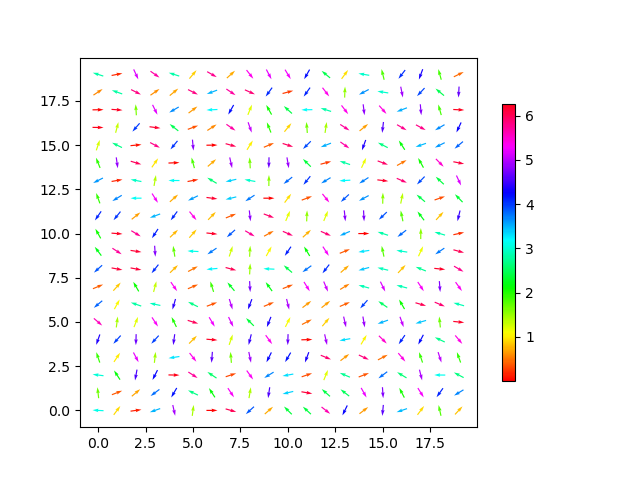

In [461]:
plt.close('all')
spins = Spin2D(20, max_rotation=1, B=1)

In [478]:
for i in tqdm(range(10000)):
    spins.update()

100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1241.12it/s]


In [481]:
m = []
for i in tqdm(range(10000)):
    spins.update()
    m.append(spins.M)

100%|███████████████████████████████████| 10000/10000 [00:08<00:00, 1232.82it/s]


In [482]:
m_arr = np.array(m)
print(f"Average magnetization: {m_arr.mean():.3f} ± {m_arr.std():.3f}")

Average magnetization: 0.857 ± 0.012


In [473]:
m_arr.std()/()

array([], dtype=float64)

In [463]:
spins.animate(200, 1)

100%|█████████████████████████████████████████| 200/200 [00:11<00:00, 17.69it/s]


# Ensemble

In [ ]:
class Tester:
    def __init__(self):
        # do nothing
    
    